In [1]:
#Weslley Lioba Caldas

# Regularized Least Squares

## importando bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle
from scipy import stats

## importando os dados

In [10]:
df=pd.read_csv('ex1data3.txt',sep=' ',header=None)
df.columns=['x1','x2','x3','x4','x5','y']
#Adcionando o intercept
df.insert(loc=0, column='x0', value=1)

## Apresentando os dados

In [13]:
df.head()

,x0,x1,x2,x3,x4,x5,y
0,1,2.104,3,1.214590,1.645454,2.040360,3.999
1,1,1.600,3,0.804845,1.156956,1.043933,3.299
2,1,2.400,3,1.526176,1.990969,2.735965,3.690
3,1,1.416,2,1.017324,1.048135,0.873698,2.320
4,1,3.000,4,1.352385,2.118710,2.403007,5.399


### Divisão em treino e teste

In [89]:
data=df.values
treino=data[0:30,:]
teste=data[30:,:]

x_treino=treino[:,0:6]
y_treino=treino[:,6]
x_teste=teste[:,0:6]
y_teste=teste[:,6]

In [93]:
np.linalg.norm(w)

1.0669860811271061

In [99]:
W=[]
norm_w=[]
eqm_treino=[]
eqm_teste=[]
for lamb in range(0,6):
    I=np.eye(6)
    I[0,0]=0
    w=np.matmul(np.matmul(np.linalg.pinv(np.matmul(x_treino.T,x_treino)+lamb*I),x_treino.T),y_treino)
    eqm_treino.append(sum((y_treino-np.matmul(x_treino,w))**2)/30)
    eqm_teste.append(sum((y_teste-np.matmul(x_teste,w))**2)/17)
    norm_w.append(np.linalg.norm(w))
    W.append(w)
    

### Norma do vetor de coeficientes

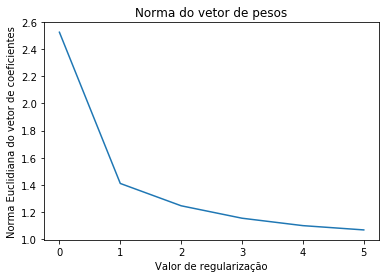

In [100]:
plt.plot(norm_w)
plt.title('Norma do vetor de pesos')
plt.xlabel('Valor de regularização')
plt.ylabel('Norma Euclidiana do vetor de coeficientes')
plt.show()
#na medida que o valor de regularização aumenta a norma do vetor de coeficientes cai, indicando que existe uma maior penalidade para valores de coeficientes muito grandes

## Erro Quadrático Médio

### EQM para o treino

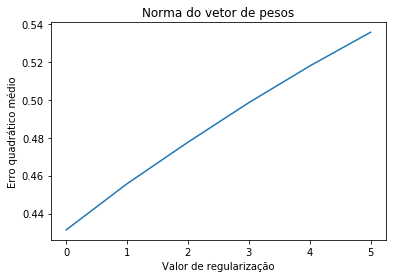

In [104]:
plt.plot(eqm_treino)
plt.title('EQM no treino')
plt.xlabel('Valor de regularização')
plt.ylabel('Erro quadrático médio')
plt.show()
#na medida que o valor de regularização aumenta o EQM no treino aumenta também

### EQM para o teste

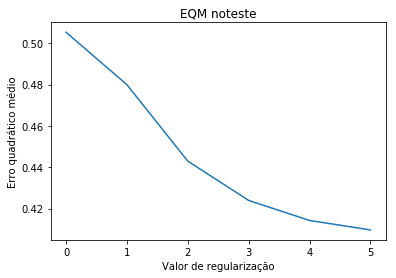

In [106]:
plt.plot(eqm_teste)
plt.title('EQM noteste')
plt.xlabel('Valor de regularização')
plt.ylabel('Erro quadrático médio')
plt.show()
#na medida que o valor de regularização aumenta o EQM no teste diminui. 

### Mas como pode o EQM aumentar no treino e diminuir no teste para o mesmo fator de regularização?

### É simples. Em alguns casos quando o vetor de coeficientes de regressão w se ajusta demais ao conjunto de treinamento, temos o que chamamos de overfitting, que é quando nosso modelo fica enviesado com os dados disponíveis, em outras palavras, ele se ajusta tanto aos dados do treino, que acaba perdendo o poder de generalização e acaba errando mais no conjunto de teste. Para solucionar este problemas adcionamos um fator de regularização que força o encolhimento do vetor w, não permitindo que ele se ajuste totalmente aos dados de treino.